# Task 1: Data Preparation & Customer Analytics
## 1. Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trandt=pd.read_excel("QVI_transaction_data.xlsx")
print(trandt.head(5))

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [3]:
purchdt=pd.read_csv("QVI_purchase_behaviour.csv")
print(purchdt.head(5))

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [4]:
mergedt=pd.merge(purchdt, trandt, on="LYLTY_CARD_NBR", how="right")
print(mergedt.head(5))

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0            1000   YOUNG SINGLES/COUPLES          Premium  43390          1   
1            1307  MIDAGE SINGLES/COUPLES           Budget  43599          1   
2            1343  MIDAGE SINGLES/COUPLES           Budget  43605          1   
3            2373  MIDAGE SINGLES/COUPLES           Budget  43329          2   
4            2426  MIDAGE SINGLES/COUPLES           Budget  43330          2   

   TXN_ID  PROD_NBR                                 PROD_NAME  PROD_QTY  \
0       1         5    Natural Chip        Compny SeaSalt175g         2   
1     348        66                  CCs Nacho Cheese    175g         3   
2     383        61    Smiths Crinkle Cut  Chips Chicken 170g         2   
3     974        69    Smiths Chip Thinly  S/Cream&Onion 175g         5   
4    1038       108  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3   

   TOT_SALES  
0        6.0  
1        6.3  
2        2.9  
3       

**a. Check the format of the data.**

In [5]:
print(mergedt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB
None


**DATE data should be in datetime format.**

In [6]:
import datetime

In [7]:
from datetime import date, timedelta
start=date(1899,12,30)
# 1899-12-30 is the zero day.

newdateformat=[]

for date in mergedt["DATE"]:
    delta=timedelta(date)
    newdateformat.append(start+delta)

In [8]:
mergedt["DATE"]=pd.to_datetime(pd.Series(newdateformat))
print(mergedt["DATE"].dtype)

datetime64[ns]


#### b. Ensure that all products are Chips

In [9]:
mergedt["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [10]:
split_prod=mergedt["PROD_NAME"].str.replace(r'([0-9]+[gG])', '', regex=True).str.replace(r'[^\w]', ' ', regex=True).str.split()

In [11]:
countword = {}

def wordcounter(line):
    for word in line:
        if word not in countword:
            countword[word]=1
        else:
            countword[word]+=1

split_prod.apply(lambda line: wordcounter(line))
print(pd.Series(countword).sort_values(ascending=False))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


**Remove Salsa products**

In [12]:
mergedt=mergedt[~mergedt["PROD_NAME"].str.contains(r"[Ss]alsa")]

#### c. Check ouliers in PROD_QTY

In [13]:
print(mergedt.describe())

       LYLTY_CARD_NBR      STORE_NBR        TXN_ID       PROD_NBR  \
count    2.467420e+05  246742.000000  2.467420e+05  246742.000000   
mean     1.355310e+05     135.051098  1.351311e+05      56.351789   
std      8.071528e+04      76.787096  7.814772e+04      33.695428   
min      1.000000e+03       1.000000  1.000000e+00       1.000000   
25%      7.001500e+04      70.000000  6.756925e+04      26.000000   
50%      1.303670e+05     130.000000  1.351830e+05      53.000000   
75%      2.030840e+05     203.000000  2.026538e+05      87.000000   
max      2.373711e+06     272.000000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  246742.000000  246742.000000  
mean        1.908062       7.321322  
std         0.659831       3.077828  
min         1.000000       1.700000  
25%         2.000000       5.800000  
50%         2.000000       7.400000  
75%         2.000000       8.800000  
max       200.000000     650.000000  


In [14]:
mergedt["PROD_QTY"].value_counts(bins=5).sort_index()

(0.8, 40.8]       246740
(40.8, 80.6]           0
(80.6, 120.4]          0
(120.4, 160.2]         0
(160.2, 200.0]         2
Name: PROD_QTY, dtype: int64

In [15]:
mergedt.sort_values(by="PROD_QTY", ascending=False)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
135225,46296,RETIREES,Budget,2019-05-15,46,42138,81,Pringles Original Crisps 134g,5,18.5
69523,71142,OLDER FAMILIES,Premium,2019-05-15,71,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,55144,OLDER FAMILIES,Premium,2018-08-18,55,49328,44,Thins Chips Light& Tangy 175g,5,16.5
...,...,...,...,...,...,...,...,...,...,...
150883,184055,RETIREES,Mainstream,2018-08-14,184,186586,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6
150885,184152,RETIREES,Mainstream,2019-05-17,184,187227,28,Thins Potato Chips Hot & Spicy 175g,1,3.3
29682,174004,NEW FAMILIES,Mainstream,2018-12-04,174,174974,114,Kettle Sensations Siracha Lime 150g,1,4.6
150887,184205,RETIREES,Mainstream,2019-05-17,184,187584,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7


**Remove the 2 objects with PROD_QTY value equals 200.**

In [16]:
mergedt=mergedt[mergedt["PROD_QTY"]<200]

In [17]:
# Doublecheck
mergedt.sort_values(by="PROD_QTY", ascending=False)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
80732,49309,OLDER SINGLES/COUPLES,Budget,2019-05-18,49,45816,30,Doritos Corn Chips Cheese Supreme 170g,5,22.0
17145,202289,MIDAGE SINGLES/COUPLES,Premium,2018-08-16,202,202104,42,Doritos Corn Chip Mexican Jalapeno 150g,5,19.5
117547,81120,OLDER SINGLES/COUPLES,Premium,2019-05-19,81,80285,46,Kettle Original 175g,5,27.0
99458,138085,OLDER SINGLES/COUPLES,Mainstream,2018-08-17,138,141016,40,Thins Chips Seasonedchicken 175g,5,16.5
28135,51263,NEW FAMILIES,Mainstream,2018-08-20,51,46961,3,Kettle Sensations Camembert & Fig 150g,5,23.0
...,...,...,...,...,...,...,...,...,...,...
150883,184055,RETIREES,Mainstream,2018-08-14,184,186586,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6
150885,184152,RETIREES,Mainstream,2019-05-17,184,187227,28,Thins Potato Chips Hot & Spicy 175g,1,3.3
29682,174004,NEW FAMILIES,Mainstream,2018-12-04,174,174974,114,Kettle Sensations Siracha Lime 150g,1,4.6
150887,184205,RETIREES,Mainstream,2019-05-17,184,187584,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7


#### d. Check DATE data unique values

In [18]:
print(mergedt["DATE"].describe())

count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


**Observe that only 364 unique values instead of 365 (1 year).**

In [19]:
pd.date_range(start=mergedt["DATE"].min(), end=mergedt["DATE"].max()).difference(mergedt["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

**The missing day is 2018-12-25, which is Christmas holiday. It is possible that the store was closed on this day.<br>Therefore, we assume that this missing value is normal and do not affect our analysis.**

#### e. Check the brand product names in PROD_NAME

In [20]:
print(mergedt["PROD_NAME"].str.split().str[0].value_counts().sort_index())

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64


**Notice that brand product names data is not unique.** <br>**Non-unique brand names:** 
- "Dorito" & "Doritos"
- "Grain" & "GrnWves"
- "Infuzions" & "Infzns"
- "Smith" & "Smiths"
- "Snbts" & "Sunbites"
- "WW" & "Woolworths"

In [21]:
mergedt["BRAND NAMES"]=mergedt["PROD_NAME"].str.split().str[0]

In [22]:
def brandnameclean(line):
    brand=line["BRAND NAMES"]
    if brand=="Dorito":
        return "Doritos"
    elif brand=="Grain" or brand=="GrnWves":
        return "Grain Waves"
    elif brand=="Infzns":
        return "Infuzions"
    elif brand=="Smith":
        return "Smiths"
    elif brand=="Snbts":
        return "Sunbites"
    elif brand=="WW":
        return "Woolworths"
    else: 
        return brand

In [23]:
mergedt["BRAND NAMES"]=mergedt.apply(lambda line: brandnameclean(line), axis=1)

In [24]:
print(mergedt["BRAND NAMES"])

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: BRAND NAMES, Length: 246740, dtype: object


## 2. Data Analysis

In [25]:
print(mergedt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    246740 non-null  int64         
 1   LIFESTAGE         246740 non-null  object        
 2   PREMIUM_CUSTOMER  246740 non-null  object        
 3   DATE              246740 non-null  datetime64[ns]
 4   STORE_NBR         246740 non-null  int64         
 5   TXN_ID            246740 non-null  int64         
 6   PROD_NBR          246740 non-null  int64         
 7   PROD_NAME         246740 non-null  object        
 8   PROD_QTY          246740 non-null  int64         
 9   TOT_SALES         246740 non-null  float64       
 10  BRAND NAMES       246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 22.6+ MB
None


**Find the customer segments generate the most total sales.** 

In [26]:
groupedsales=pd.DataFrame(mergedt.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))

In [27]:
groupedsales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

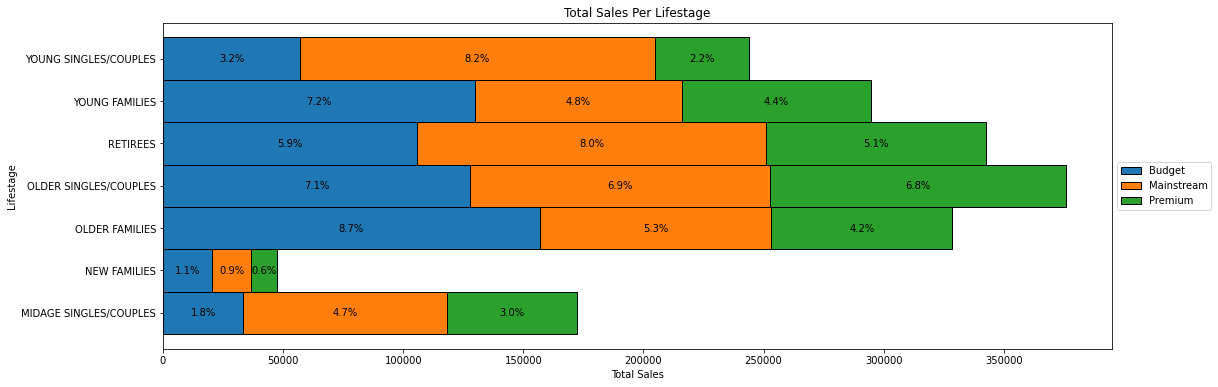

In [28]:
# Values of each groups:
b1=groupedsales[groupedsales.index.get_level_values("PREMIUM_CUSTOMER")=="Budget"]["sum"]
b2=groupedsales[groupedsales.index.get_level_values("PREMIUM_CUSTOMER")=="Mainstream"]["sum"]
b3=groupedsales[groupedsales.index.get_level_values("PREMIUM_CUSTOMER")=="Premium"]["sum"]

fb1=(b1/sum(groupedsales["sum"])).apply("{:.1%}".format)
fb2=(b2/sum(groupedsales["sum"])).apply("{:.1%}".format)
fb3=(b3/sum(groupedsales["sum"])).apply("{:.1%}".format)

# Names of groups: 
names=groupedsales.index.get_level_values("LIFESTAGE").unique()

#Bars position on x-axis:
r=np.arange(len(names))

plt.figure(figsize=(17,6))

#Create bars:
budgetbar=plt.barh(r, b1, edgecolor="black", height=1, label="Budget")
mainstrmbar=plt.barh(r, b2, left=b1, edgecolor="black", height=1, label="Mainstream")
premiumbar=plt.barh(r, b3, left=np.array(b1)+np.array(b2), edgecolor="black", height=1, label="Premium")

for i in range(7):
    budget_width=budgetbar[i].get_width()
    budget_main_width = budget_width + mainstrmbar[i].get_width()
    plt.text(budget_width/2, i, fb1[i], va='center', ha='center', size=10)
    plt.text(budget_width + mainstrmbar[i].get_width()/2, i, fb2[i], va='center', ha='center', size=10)
    plt.text(budget_main_width + premiumbar[i].get_width()/2, i, fb3[i], va='center', ha='center', size=10)

plt.title("Total Sales Per Lifestage")
plt.xlabel("Total Sales")
plt.ylabel("Lifestage")
plt.yticks(r, names)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [29]:
print("Top 3 total sales contributors per LIFESTAGE by PREMIUM CUSTOMER:")
print(groupedsales.sort_values(ascending=False, by="sum").head(3))

Top 3 total sales contributors per LIFESTAGE by PREMIUM CUSTOMER:
                                              sum      mean
LIFESTAGE             PREMIUM_CUSTOMER                     
OLDER FAMILIES        Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES Mainstream        147582.20  7.551279
RETIREES              Mainstream        145168.95  7.269352


**Find the customer segments generate the most average sales.** 

In [30]:
print("Top 3 average sales contributors per LIFESTAGE by PREMIUM CUSTOMER:")
print(groupedsales.sort_values(ascending=False, by="mean").head(3))

Top 3 average sales contributors per LIFESTAGE by PREMIUM CUSTOMER:
                                               sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Premium            91296.65  7.461315


**Find the customer segments have the highest populations.** 

In [31]:
groupedcust=mergedt.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values()
print(groupedcust)

LIFESTAGE               PREMIUM_CUSTOMER
NEW FAMILIES            Premium              575
                        Mainstream           830
                        Budget              1087
MIDAGE SINGLES/COUPLES  Budget              1474
OLDER FAMILIES          Premium             2231
MIDAGE SINGLES/COUPLES  Premium             2369
YOUNG FAMILIES          Premium             2398
YOUNG SINGLES/COUPLES   Premium             2480
YOUNG FAMILIES          Mainstream          2685
OLDER FAMILIES          Mainstream          2788
MIDAGE SINGLES/COUPLES  Mainstream          3298
YOUNG SINGLES/COUPLES   Budget              3647
RETIREES                Premium             3812
YOUNG FAMILIES          Budget              3953
RETIREES                Budget              4385
OLDER FAMILIES          Budget              4611
OLDER SINGLES/COUPLES   Premium             4682
                        Budget              4849
                        Mainstream          4858
RETIREES                Main

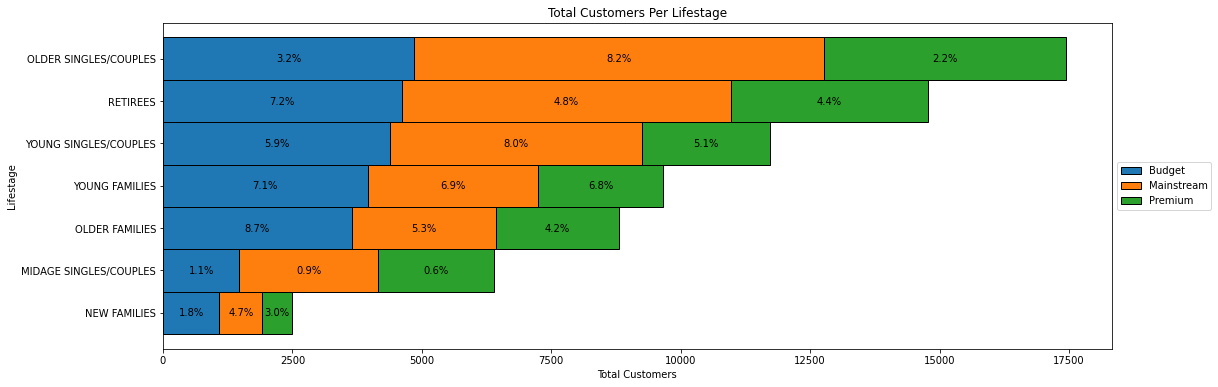

In [32]:
# Values of each groups:
custb1=groupedcust[groupedcust.index.get_level_values("PREMIUM_CUSTOMER")=="Budget"]
custb2=groupedcust[groupedcust.index.get_level_values("PREMIUM_CUSTOMER")=="Mainstream"]
custb3=groupedcust[groupedcust.index.get_level_values("PREMIUM_CUSTOMER")=="Premium"]

cfb1=(b1/sum(groupedsales["sum"])).apply("{:.1%}".format)
cfb2=(b2/sum(groupedsales["sum"])).apply("{:.1%}".format)
cfb3=(b3/sum(groupedsales["sum"])).apply("{:.1%}".format)

# Names of groups: 
names=groupedcust.index.get_level_values("LIFESTAGE").unique()

#Bars position on x-axis:
r=np.arange(len(names))

plt.figure(figsize=(17,6))

#Create bars:
cbudgetbar=plt.barh(r, custb1, edgecolor="black", height=1, label="Budget")
cmainstrmbar=plt.barh(r, custb2, left=custb1, edgecolor="black", height=1, label="Mainstream")
cpremiumbar=plt.barh(r, custb3, left=np.array(custb1)+np.array(custb2), edgecolor="black", height=1, label="Premium")

for i in range(7):
    budget_width=cbudgetbar[i].get_width()
    budget_main_width = budget_width + cmainstrmbar[i].get_width()
    plt.text(budget_width/2, i, cfb1[i], va='center', ha='center', size=10)
    plt.text(budget_width + cmainstrmbar[i].get_width()/2, i, cfb2[i], va='center', ha='center', size=10)
    plt.text(budget_main_width + cpremiumbar[i].get_width()/2, i, cfb3[i], va='center', ha='center', size=10)

plt.title("Total Customers Per Lifestage")
plt.xlabel("Total Customers")
plt.ylabel("Lifestage")
plt.yticks(r, names)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [33]:
print("Top 3 customer segments with highest population:")
print(groupedcust.sort_values(ascending=False).head(3))

Top 3 customer segments with highest population:
LIFESTAGE              PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES  Mainstream          7917
RETIREES               Mainstream          6358
OLDER SINGLES/COUPLES  Mainstream          4858
Name: LYLTY_CARD_NBR, dtype: int64


**Find the customer segments with highest average frequency of purchases.**

In [34]:
freqcust=mergedt.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
print("Top 3 customer segments with highest average frequency of purchases:")
print(freqcust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean").head(3))

Top 3 customer segments with highest average frequency of purchases:
                                     mean  count
LIFESTAGE      PREMIUM_CUSTOMER                 
OLDER FAMILIES Mainstream        4.749283   2788
               Budget            4.665799   4611
               Premium           4.662931   2231


**Find the best-selling brands by customer segments.**

In [52]:
mergedt.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["BRAND NAMES"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

**Find the best-selling packet sizes.**

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


<AxesSubplot:ylabel='Frequency'>

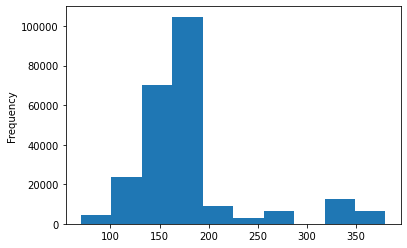

In [53]:
mergedt["PROD_NAME"] = mergedt["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
packsizes = mergedt["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(packsizes.describe())
packsizes.plot.hist()

### 3. Data Insights

* Top 3 **total sales** contributor segments are: 
    - OLDER FAMILIES (Budget) | Total sales: 156863.75  
    - YOUNG SINGLES/COUPLES (Mainstream) | Total sales: 147582.20  
    - RETIREES (Mainstream) | Total sales: 145168.95
* Top 3 **average sales** contributor segments are:
    - MIDAGE SINGLES/COUPLES (Mainstream) | Average sales: 7.637156
    - YOUNG SINGLES/COUPLES (Mainstream) | Average sales: 7.551279  
    - RETIREES (Premium) | Average sales: 7.461315
* Top 3 customer segments with **highest population** are: 
    - YOUNG SINGLES/COUPLES (Mainstream) | Population: 7917
    - RETIREES (Mainstream) | Population: 6358
    - OLDER SINGLES/COUPLES (Mainstream) | Population: 4858
* Top 3 customer segments with **highest average frequency** of purchases:
    - OLDER FAMILIES (Mainstream) | Frequency: 4.749283
    - OLDER FAMILIES (Budget) | Frequency: 4.665799
    - OLDER FAMILIES (Premium) | Frequency: 4.662931
* Chips brand **Kettle** dominates all segments as the most purchased brand.
* Most frequent chip size purchased is **175gr** followed by the **150gr** chip size.

### Recommendation

1. Customer Segments:
    1. OLDER FAMILIES - BUDGET:    
    Strength: High frequency of purchases & Contribute high total sales.
    <br>Recommendation: Offer discounts to enhance times and amounts of purchasing the next times.
    2. YOUNG SINGLES/COUPLES - MAINSTREAM:
    Strength: Contribute high total+average sales & High population quantity.
    <br>Recommendation: This is a potential customer segments. Heavily and frequently promote targeting this customer segments.
    3. RETIREES - MAINSTREAM:
    Strength: Contribute high total+average sales & High population quantity.
    <br>Recommendation: The same with YOUNG SINGLES/COUPLES - MAINSTREAM, but less prioritized.
2. Product:
<br>Two key takeaways for future strategies:
<br>Best-selling brand: Kettle
<br>Best-selling size: 175gr, followed by 150gr